In [8]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

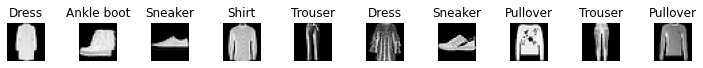

In [9]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few random images
num_images = 10

ids = np.random.randint(0, xtrain.shape[0], size=num_images)

fig, ax = plt.subplots(1, num_images, figsize=(num_images, 1))

for i in range(num_images):
    ax[i].imshow(xtrain[ids[i]], cmap='gray')
    ax[i].set_title(labels[ytrain[ids[i]]])
    ax[i].axis('off')

plt.tight_layout()

In [10]:
xtrain = xtrain / 255
xtest = xtest / 255
# Reshape to (num_samples, width, height, channels)
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)
ytrain = keras.utils.to_categorical(ytrain, 10)

In [29]:
def create_model(num_FC_units, alpha):
    """Creates a simple CNN 

    Params:
        num_FC_units: The number of units in the first fully connected layer
        alpha: The learning rate
    Returns:
        The model
    """

    model = keras.Sequential()

    model.add(keras.layers.InputLayer(input_shape=(xtrain.shape[1], 
                                                    xtrain.shape[2], 1)))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=num_FC_units, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model
    # We want to change the learning rate, so we need to create a new optimizer
    optimizer = keras.optimizers.Adam(learning_rate=alpha)
    model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

    return(model)

def get_model_accuracy(model, epochs=20):
    """Trains the model

    Params:
        model: The model to train
        epochs: The number of epochs to train for (default 20)
    Returns:
        The accuracy of the model
    """

    history = model.fit(xtrain, ytrain, 
                        batch_size=256,
                        epochs=epochs, 
                        validation_split=0.2)

    return(history.history['val_accuracy'][-1])


# Test that everything is working
# model = create_model(num_FC_units=100, alpha=0.01)
# print(model.summary())
# print(get_model_accuracy(model, 1))

In [36]:
training_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
num_nodes = [pow(2, i) for i in range(5, 11)]
accuracies = np.zeros(shape=(len(training_rates), len(num_nodes)))

for i, t in enumerate(training_rates):
    for j, n in enumerate(num_nodes):
        print(f"Training CNN with alpha = {t} and {n} FC nodes")
        model = create_model(num_FC_units=n, alpha=t)
        accuracies[i, j] = get_model_accuracy(model, epochs=5)

Training CNN with alpha = 1e-05 and 32 FC nodes
Epoch 1/5
188/188 [==============================] - 4s 16ms/step - loss: 2.2485 - accuracy: 0.2684 - val_loss: 2.1776 - val_accuracy: 0.4887
Epoch 2/5
188/188 [==============================] - 3s 14ms/step - loss: 2.0773 - accuracy: 0.5221 - val_loss: 1.9541 - val_accuracy: 0.5265
Epoch 3/5
188/188 [==============================] - 3s 15ms/step - loss: 1.7993 - accuracy: 0.5159 - val_loss: 1.6301 - val_accuracy: 0.5139
Epoch 4/5
188/188 [==============================] - 3s 14ms/step - loss: 1.4754 - accuracy: 0.5444 - val_loss: 1.3241 - val_accuracy: 0.6005
Epoch 5/5
188/188 [==============================] - 3s 14ms/step - loss: 1.2096 - accuracy: 0.6226 - val_loss: 1.0981 - val_accuracy: 0.6633
Training CNN with alpha = 1e-05 and 64 FC nodes
Epoch 1/5
188/188 [==============================] - 3s 16ms/step - loss: 2.2091 - accuracy: 0.3594 - val_loss: 2.0839 - val_accuracy: 0.5087
Epoch 2/5
188/188 [==============================] -

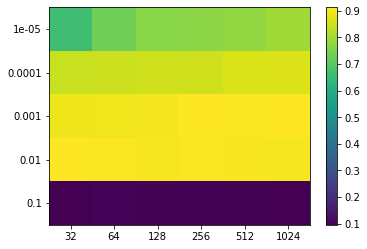

In [42]:
plt.imshow(accuracies)
plt.xticks(range(len(num_nodes)), labels=num_nodes)
plt.yticks(range(len(training_rates)), labels=training_rates)
plt.colorbar()
plt.show()